In [54]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
car_df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [56]:
print(f"columns Data type: {car_df.info()}\n")
print(f"The shape of dataset is {car_df.shape}\n")
print(f"Number of empty or null values: {car_df.isnull().sum()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
columns Data type: None

The shape of dataset is (4340, 8)

Number of empty or null values: name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64



In [57]:
car_df['transmission'].isnull().sum()

0

In [58]:
column=[]
dtype=[]
no_unique_val=[]
list_unique_val=[]
no_null_values=[]

for col in car_df.columns:
    column.append(col)
    dtype.append(car_df[col].dtype)
    no_unique_val.append(car_df[col].nunique())
    list_unique_val.append(car_df[col].unique().tolist())
    no_null_values.append(car_df[col].isnull().sum())
    
emp={"column":column,
    "dtype":dtype,
    "no_unique_val":no_unique_val,
     "no_null_values":no_null_values,
    "list_unique_val":list_unique_val}

column_des=pd.DataFrame(emp)
column_des.sort_values(by='dtype', inplace=True)
column_des

,column,dtype,no_unique_val,no_null_values,list_unique_val
1,year,int64,27,0,"[2007, 2012, 2017, 2014, 2016, 2015, 2018, 201..."
2,selling_price,int64,445,0,"[60000, 135000, 600000, 250000, 450000, 140000..."
3,km_driven,int64,770,0,"[70000, 50000, 100000, 46000, 141000, 125000, ..."
0,name,object,1491,0,"[Maruti 800 AC, Maruti Wagon R LXI Minor, Hyun..."
4,fuel,object,5,0,"[Petrol, Diesel, CNG, LPG, Electric]"
5,seller_type,object,3,0,"[Individual, Dealer, Trustmark Dealer]"
6,transmission,object,2,0,"[Manual, Automatic]"
7,owner,object,5,0,"[First Owner, Second Owner, Fourth & Above Own..."


In [59]:
car_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [60]:
car_df['no_year']=-car_df['year']+2023
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [61]:
car_df.drop(columns=['name', 'year'], axis=1, inplace=True)
car_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,16
1,135000,50000,Petrol,Individual,Manual,First Owner,16
2,600000,100000,Diesel,Individual,Manual,First Owner,11
3,250000,46000,Petrol,Individual,Manual,First Owner,6
4,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [62]:
df = pd.get_dummies(car_df, drop_first=True)
df.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,16,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,16,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,11,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,6,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,9,1,0,0,0,1,0,1,0,1,0,0


In [63]:
# correlation
df.corr()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


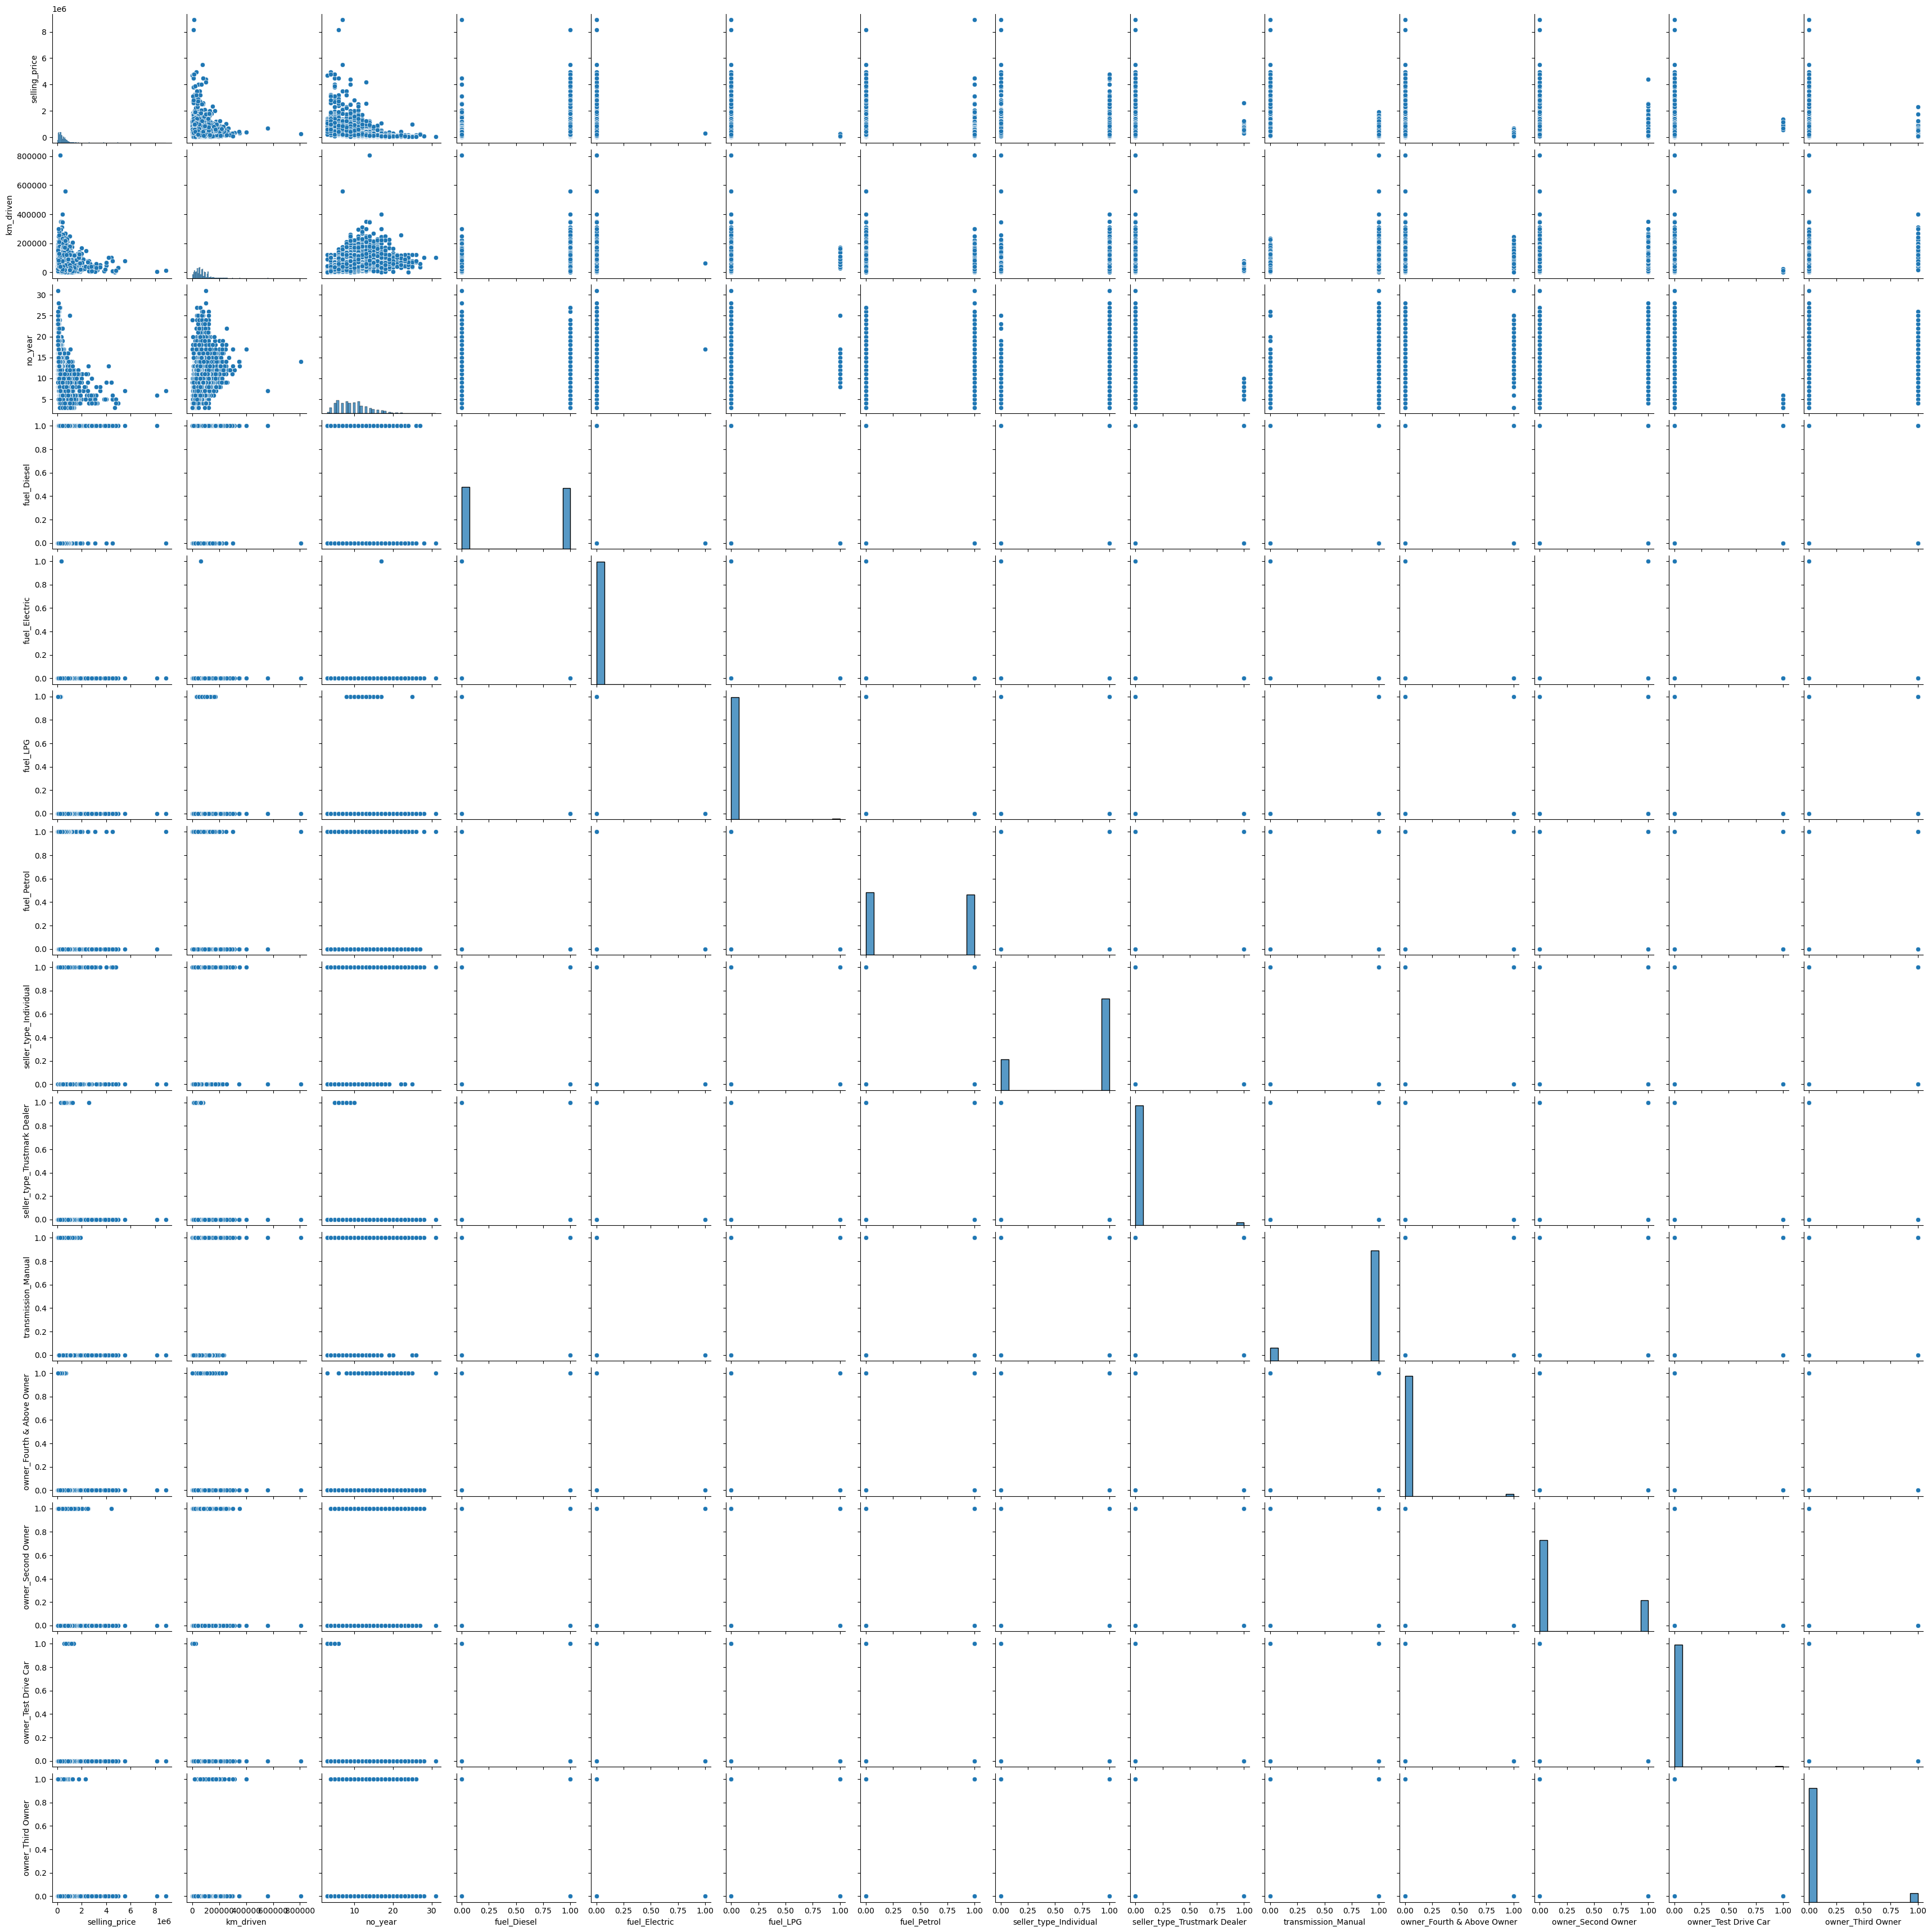

In [64]:
sns.pairplot(df)

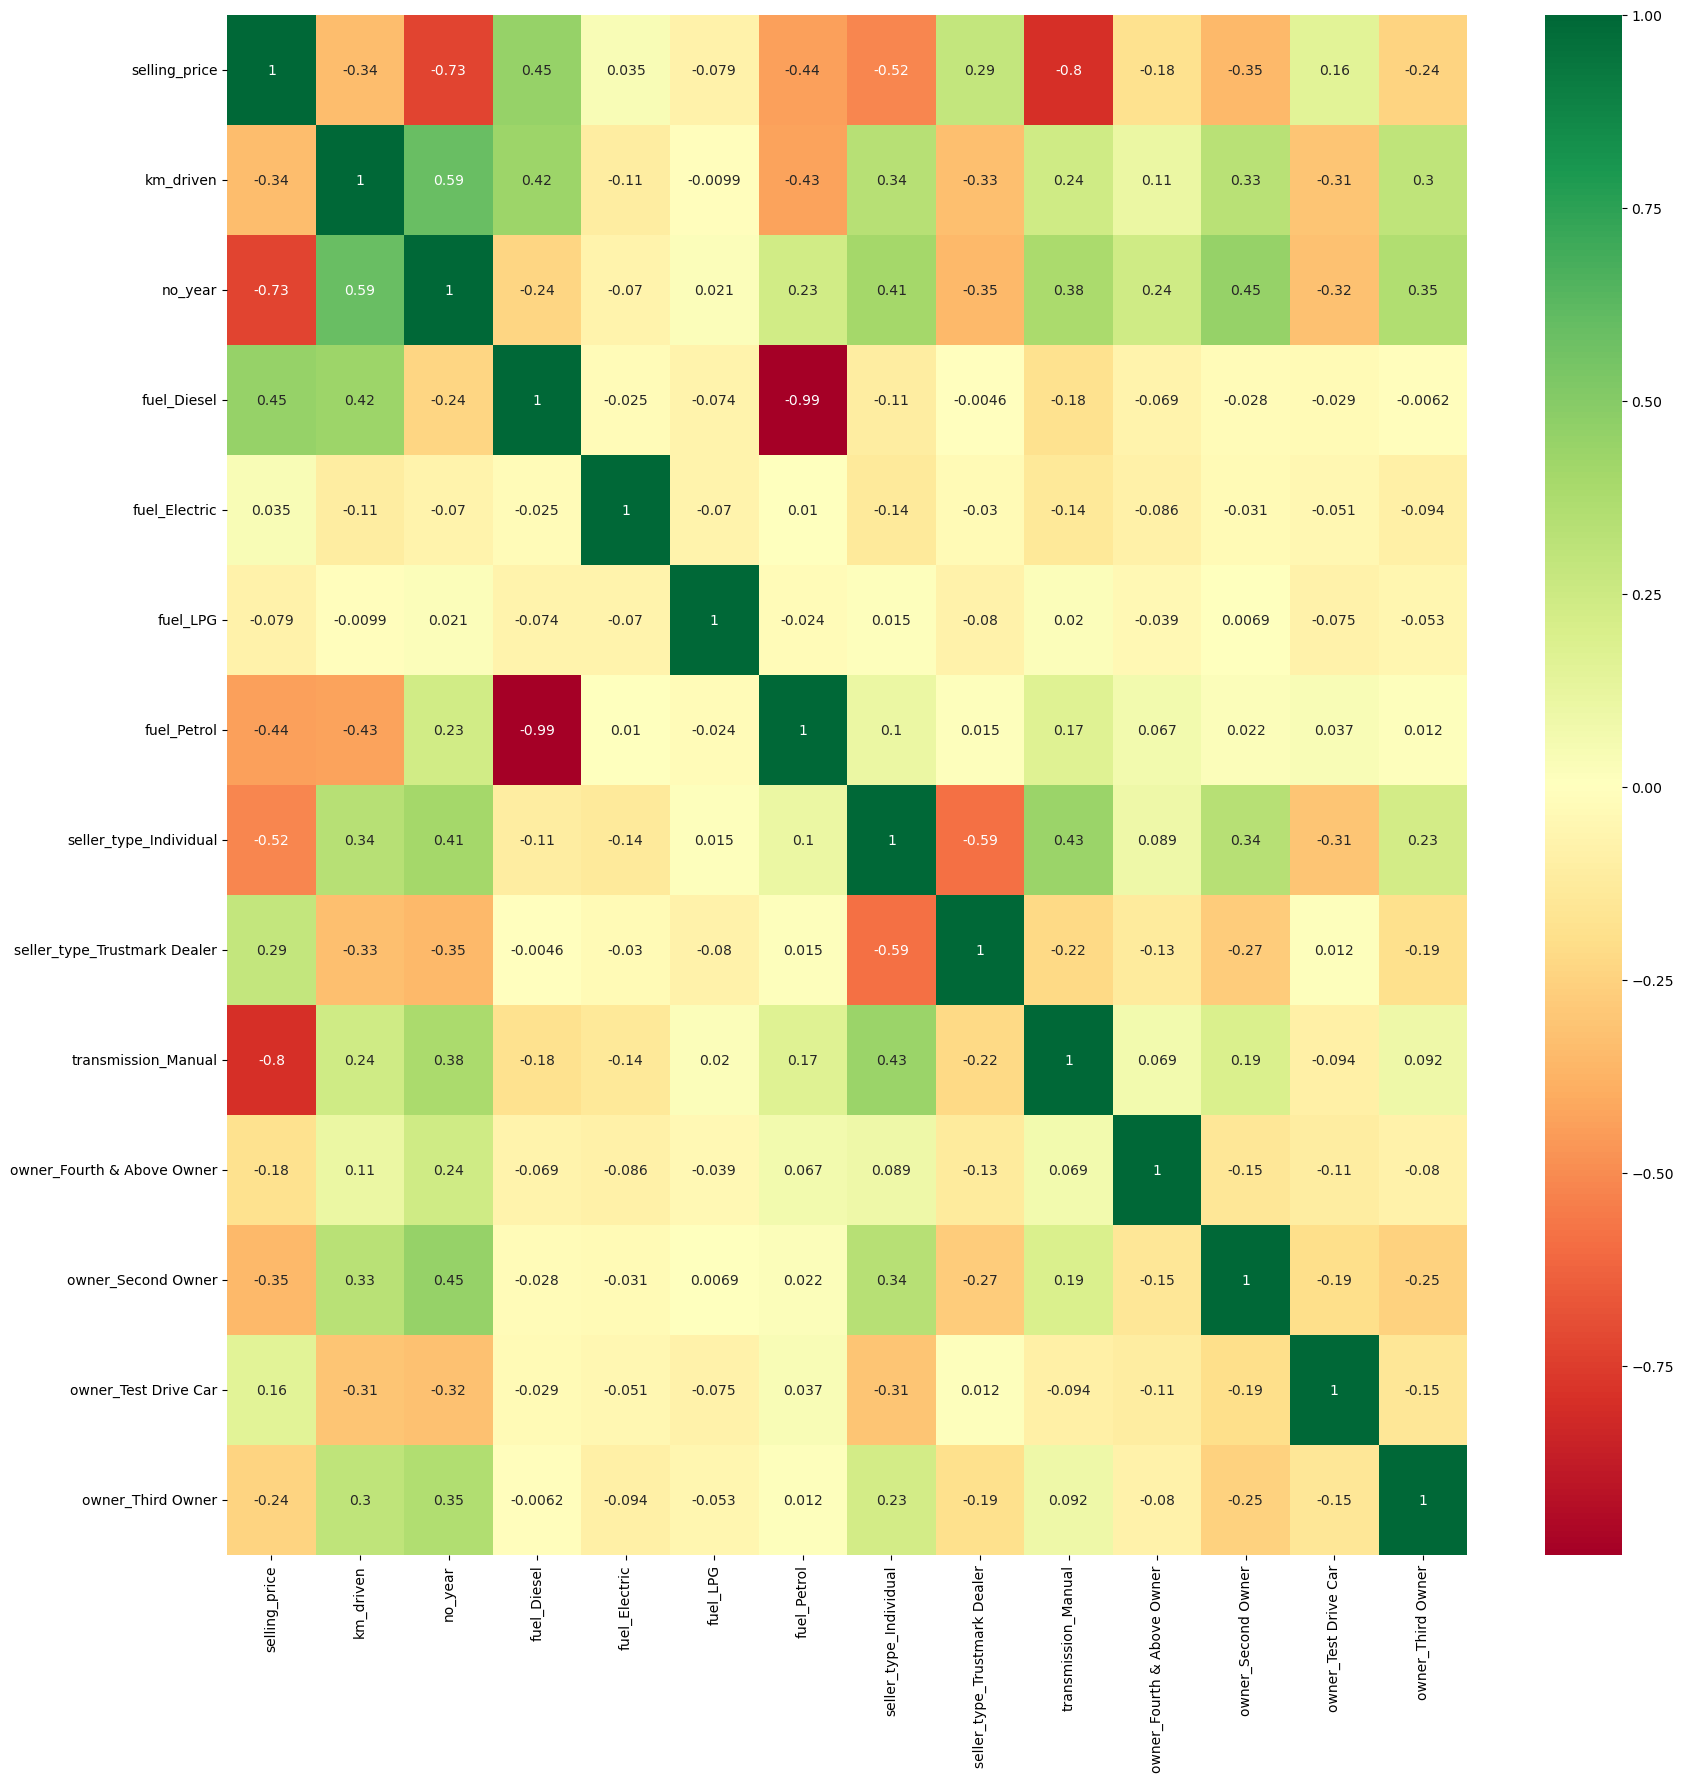

In [65]:
# visual correlation
%matplotlib inline
corrmat=df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat.corr(), annot=True,cmap='RdYlGn')

In [66]:
# independant and dependant features
X=df.iloc[:,1:]
y=df.loc[:,'selling_price']

In [67]:
# feauture importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [68]:
print(model.feature_importances_)

[2.45570747e-01 2.44751494e-01 1.29930090e-01 2.76858402e-05
 2.43915649e-05 2.05120143e-04 4.85917574e-02 8.84944323e-03
 2.92836275e-01 7.61760583e-04 2.33396124e-02 7.69156583e-04
 4.34246644e-03]


<AxesSubplot:>

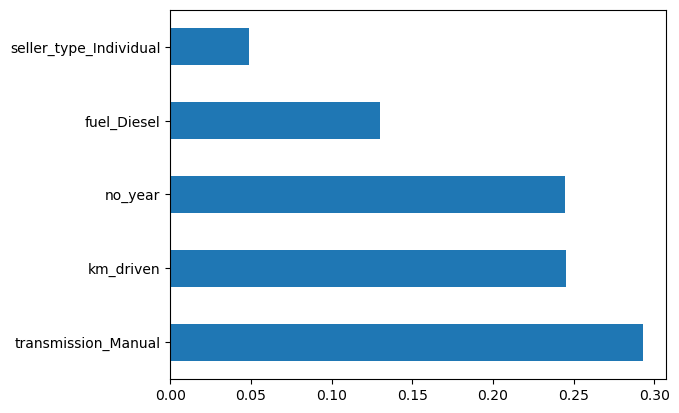

In [69]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')

In [105]:
# train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [106]:
X_train.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
227,20000,6,1,0,0,0,1,0,1,0,0,0,0
964,50000,5,1,0,0,0,1,0,1,0,0,0,0
2045,25000,10,0,0,0,1,1,0,1,0,1,0,0
1025,70000,12,1,0,0,0,1,0,1,0,0,0,0
4242,72000,6,1,0,0,0,0,0,1,0,0,0,0


In [107]:
km_driven_mean=X_train['km_driven'].mean()
km_driven_std=X_train['km_driven'].std()

no_year_mean=X_train['no_year'].mean()
no_year_std=X_train['no_year'].std()

In [108]:
def X_0_scaler(x):
    return (x-km_driven_mean)/km_driven_std
def X_1_scaler(x):
    return (x-no_year_mean)/no_year_std

In [110]:
print(f'km_driven_mean is {round(km_driven_mean,2)}')
print(f'no_year_mean is {round(no_year_mean,2)}\n')

print(f'km_driven_std is {round(km_driven_std,2)}')
print(f'no_year_std is {round(no_year_std,2)}')

km_driven_mean is 66014.13
no_year_mean is 9.88

km_driven_std is 46905.39
no_year_std is 4.21


In [75]:
# import dill as pickle
# from dill import loads, dumps
# import joblib
# joblib.dump(X_0_scaler, "scaler_0.pkl")
# scaler_0 = joblib.load("scaler_0.pkl")
import pickle
with open("X_0_scaler.pkl",'wb') as file:
    pickle.dump(X_0_scaler,file)

In [76]:
f=pickle.load(open('X_0_scaler.pkl', 'rb'))
f(1000)

-1.3860696811458588

In [77]:
# joblib.dump(X_1_scaler, "scaler_1.pkl")
# scaler_1 = joblib.load("scaler_1.pkl")

with open("X_1_scaler.pkl",'wb') as file:
    pickle.dump(X_1_scaler,file)

In [78]:
# pickle.load(open('X_1_scaler','rb'))(1000)

In [79]:
X_train['km_driven'] = X_train['km_driven'].map(lambda x: X_0_scaler(x))
X_test['km_driven'] = X_test['km_driven'].map(lambda x: X_0_scaler(x))

X_train['no_year'] = X_train['no_year'].map(lambda x: X_1_scaler(x))
X_test['no_year'] = X_test['no_year'].map(lambda x: X_1_scaler(x))

In [80]:
X_test.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
3978,0.298172,0.741123,1,0,0,0,1,0,1,0,0,0,0
1448,-0.831762,-1.398834,0,0,0,1,1,0,1,0,0,0,0
2664,-0.517875,1.216669,0,0,0,1,1,0,1,0,1,0,0
17,1.598662,-0.209969,1,0,0,0,1,0,1,0,1,0,0
1634,-0.128218,-0.685515,1,0,0,0,1,0,0,0,1,0,0


In [81]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# transformer=ColumnTransformer(transformers=[('scaler', StandardScaler(), [0,1])],remainder='passthrough')
# transformer.fit(X_train)

In [82]:
X_train=X_train.values
X_test=X_test.values

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()

In [84]:
# Hyperparameters tunning

n_estimators=[int(x) for x in np.linspace(start=100, stop=1000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_sample_split=[2,5,10,15,100]
min_sample_leaf=[1,2,5,10]

In [85]:
params={
    
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_sample_split,
    'min_samples_leaf':min_sample_leaf
}
print(params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
regressor= RandomizedSearchCV(estimator=rf_model,param_distributions=params, scoring='neg_mean_squared_error', n_iter=10,cv=5, verbose=2,random_state=42,n_jobs=1)
# model=Pipeline([('S',transformer),('m',regressor)])

In [87]:
regressor.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
pred=regressor.predict(X_test)

In [89]:
y_test[:10]

3978    165000
1448    250000
2664    120000
17      450000
1634    730000
881     155000
134     530000
2338     92800
1992    284000
2886    260000
Name: selling_price, dtype: int64

In [90]:
pred[:10]

array([ 200705.60685002,  480222.72270984,  144285.4673118 ,
        488441.7117146 , 1835984.40046967,  194341.47685535,
        467343.02758021,  100896.37868375,  540698.1252356 ,
        257146.79960606])

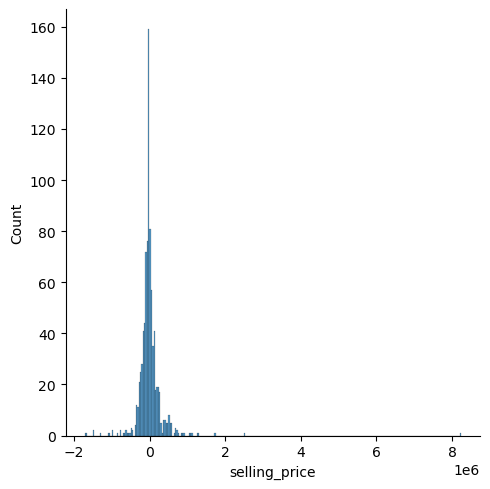

In [91]:
sns.displot(y_test-pred)

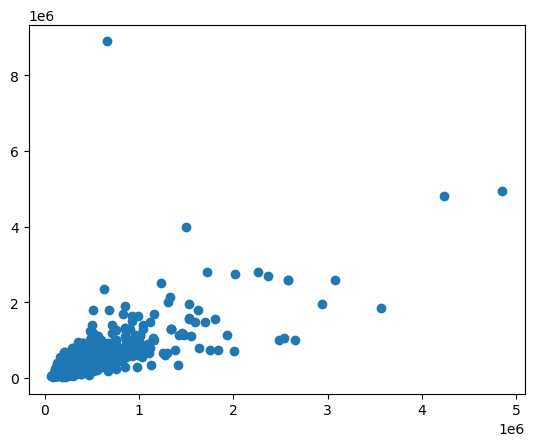

In [92]:
plt.scatter(pred,y_test)

In [93]:
import pickle
with open('random_forest_regression.pkl','wb') as file:
    pickle.dump(regressor,file)

In [94]:
# X_train.columns

In [95]:
list(['km_driven', 'no_year', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'])

['km_driven',
 'no_year',
 'fuel_Diesel',
 'fuel_Electric',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Manual',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner']

In [96]:
regressor.predict([[80000,    13,     1,     0,     0,     0,     1,     0,     1,
            0,     0,     0,     0]])

array([226703.73889744])

In [102]:
regressor.predict(X_test[:10,:])

array([ 200705.60685002,  480222.72270984,  144285.4673118 ,
        488441.7117146 , 1835984.40046967,  194341.47685535,
        467343.02758021,  100896.37868375,  540698.1252356 ,
        257146.79960606])

In [98]:
y_test.iloc[0:2].values

array([165000, 250000], dtype=int64)

In [99]:
import pickle
 
config_dictionary = {'remote_hostname': 'google.com', 'remote_port': 80}
 
# Step 2
with open('config.dictionary', 'wb') as config_dictionary_file:
 
  # Step 3
  pickle.dump(config_dictionary, config_dictionary_file)

In [100]:
# Step 2
with open('config.dictionary', 'rb') as config_dictionary_file:
 
    # Step 3
    config_dictionary = pickle.load(config_dictionary_file)
 
    # After config_dictionary is read from file
    print(config_dictionary)

{'remote_hostname': 'google.com', 'remote_port': 80}


In [101]:
config_dictionary['remote_hostname']

'google.com'